In [17]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
%store -r features_enc #read the features and labels data from previous notebook
%store -r labels

no stored variable #read the features and labels data from previous notebook


# Filter methods - Univariate feature selection - SKlearn

In [9]:
y = labels
X = features_enc
X_Percentile = SelectPercentile(f_regression, 5).fit_transform(X,y)
X_Percentile.shape

(6576, 143)

In [10]:
X_Percentile_Scores = pd.DataFrame({'Feature':list(pd.DataFrame(X).columns),
                                     'Scores':SelectPercentile(f_regression, 5).fit(X,y).scores_})
X_Percentile_Scores.sort_values(by='Scores', ascending=False).reset_index(drop=True)
# The feature labels are tramsformed to nemeric index due to the operation of VarianceThreshold

,Feature,Scores
0,HOUR(timestamp) is unknown,3824.151156
1,IS_WEEKEND(timestamp),547.879184
2,HOUR(timestamp) = 20,344.321147
3,WEEKDAY(timestamp) = 6,340.933147
4,HOUR(timestamp) = 19,315.012474
5,HOUR(timestamp) = 18,291.331281
6,HOUR(timestamp) = 21,270.807333
7,HOUR(timestamp) = 22,244.299223
8,HOUR(timestamp) = 23,211.616494
9,HOUR(timestamp) = 17,198.052395


# Wrapper methods - Simple Sequential Forward Selection - mlxtend

In [15]:
start = time.time()

rf_r = RandomForestRegressor(n_estimators=100, random_state=42)
sfs1 = SFS(rf_r, k_features=25, forward=True, floating=False, verbose=2, 
           scoring='neg_mean_squared_error', cv=0, n_jobs=-1)#choose 25 features
sfs1 = sfs1.fit(X_Percentile, y)

end = time.time()

elapsed = end - start 
print('Time for SFS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   31.8s finished

[2019-06-23 10:22:37] Features: 1/25 -- score: -768.5143670319832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   47.8s finished

[2019-06-23 10:23:25] Features: 2/25 -- score: -448.5899195169429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   52.1s finished

[2019-06-23 10:24:17] Features: 3/25 -- score: -305.39904125814354[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 140 

Time for SFS:00:36:00


[Parallel(n_jobs=-1)]: Done 119 out of 119 | elapsed:  2.3min finished

[2019-06-23 10:58:06] Features: 25/25 -- score: -133.6869973907874

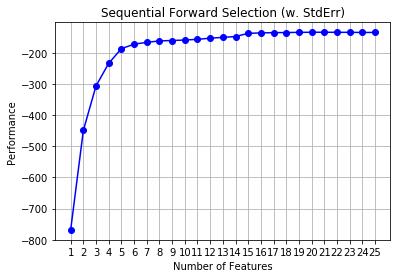

In [18]:
# Plotting the results
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [21]:
X_Percentile_sfs = sfs1.transform(X_Percentile)
X_Percentile_sfs.shape

(6576, 25)

In [22]:
# Visualizing the results in DataFrames
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,-768.514,NaN,[-768.5143670319832],"(103,)","(103,)",0,NaN
2,-448.59,NaN,[-448.5899195169429],"(9, 103)","(9, 103)",0,NaN
3,-305.399,NaN,[-305.39904125814354],"(9, 103, 140)","(9, 103, 140)",0,NaN
4,-233.092,NaN,[-233.09211400478307],"(9, 10, 103, 140)","(9, 10, 103, 140)",0,NaN
5,-185.765,NaN,[-185.76498570071925],"(9, 10, 69, 103, 140)","(9, 10, 69, 103, 140)",0,NaN
6,-171.645,NaN,[-171.64466216469094],"(9, 10, 14, 69, 103, 140)","(9, 10, 14, 69, 103, 140)",0,NaN
7,-165.56,NaN,[-165.56049111467283],"(9, 10, 14, 69, 103, 137, 140)","(9, 10, 14, 69, 103, 137, 140)",0,NaN
8,-161.038,NaN,[-161.03772857256138],"(9, 10, 14, 69, 103, 120, 137, 140)","(9, 10, 14, 69, 103, 120, 137, 140)",0,NaN
9,-159.756,NaN,[-159.75565635868247],"(5, 9, 10, 14, 69, 103, 120, 137, 140)","(5, 9, 10, 14, 69, 103, 120, 137, 140)",0,NaN
10,-158.124,NaN,[-158.12381416065074],"(5, 6, 9, 10, 14, 69, 103, 120, 137, 140)","(5, 6, 9, 10, 14, 69, 103, 120, 137, 140)",0,NaN


In [23]:
# take a look at the selected feature indices at each step
sfs1.subsets_

{1: {'feature_idx': (103,),
  'cv_scores': array([-768.51436703]),
  'avg_score': -768.5143670319832,
  'feature_names': ('103',)},
 2: {'feature_idx': (9, 103),
  'cv_scores': array([-448.58991952]),
  'avg_score': -448.5899195169429,
  'feature_names': ('9', '103')},
 3: {'feature_idx': (9, 103, 140),
  'cv_scores': array([-305.39904126]),
  'avg_score': -305.39904125814354,
  'feature_names': ('9', '103', '140')},
 4: {'feature_idx': (9, 10, 103, 140),
  'cv_scores': array([-233.092114]),
  'avg_score': -233.09211400478307,
  'feature_names': ('9', '10', '103', '140')},
 5: {'feature_idx': (9, 10, 69, 103, 140),
  'cv_scores': array([-185.7649857]),
  'avg_score': -185.76498570071925,
  'feature_names': ('9', '10', '69', '103', '140')},
 6: {'feature_idx': (9, 10, 14, 69, 103, 140),
  'cv_scores': array([-171.64466216]),
  'avg_score': -171.64466216469094,
  'feature_names': ('9', '10', '14', '69', '103', '140')},
 7: {'feature_idx': (9, 10, 14, 69, 103, 137, 140),
  'cv_scores': ar

In [25]:
# Try to add the feature names, however the SKlearn SelectPercentile transform them into number index already
feature_names = list(pd.DataFrame(X_Percentile).columns)
sfs2 = SFS(rf_r, k_features=3, forward=True, floating=False, verbose=2, 
           scoring='neg_mean_squared_error', cv=0, n_jobs=-1)#choose 25 features
sfs2 = sfs2.fit(X_Percentile, y, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 143 out of 143 | elapsed:   26.0s finished

[2019-06-23 11:19:37] Features: 1/3 -- score: -768.5143670319832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 142 out of 142 | elapsed:   41.3s finished

[2019-06-23 11:20:18] Features: 2/3 -- score: -448.5899195169429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 141 out of 141 | elapsed:   39.8s finished

[2019-06-23 11:20:58] Features: 3/3 -- score: -305.39904125814354

{1: {'feature_idx': (103,),
  'cv_scores': array([-768.51436703]),
  'avg_score': -768.5143670319832,
  'feature_names': ('103',)},
 2: {'feature_idx': (9, 103),
  'cv_scores': array([-448.58991952]),
  'avg_score': -448.5899195169429,
  'feature_names': ('9', '103')},
 3: {'feature_idx': (9, 103, 140),
  'cv_scores': array([-305.39904126]),
  'avg_score': -305.39904125814354,
  'feature_names': ('9', '103', '140')},
 4: {'feature_idx': (9, 10, 103, 140),
  'cv_scores': array([-233.092114]),
  'avg_score': -233.09211400478307,
  'feature_names': ('9', '10', '103', '140')},
 5: {'feature_idx': (9, 10, 69, 103, 140),
  'cv_scores': array([-185.7649857]),
  'avg_score': -185.76498570071925,
  'feature_names': ('9', '10', '69', '103', '140')},
 6: {'feature_idx': (9, 10, 14, 69, 103, 140),
  'cv_scores': array([-171.64466216]),
  'avg_score': -171.64466216469094,
  'feature_names': ('9', '10', '14', '69', '103', '140')},
 7: {'feature_idx': (9, 10, 14, 69, 103, 137, 140),
  'cv_scores': ar